In [1]:
library(RforHDSdata)
suppressPackageStartupMessages(library(tidyverse)) 
library(gt)
library(gtsummary)
data(NHANESsample)

In [2]:
nhanes <- NHANESsample
names(nhanes)

[1] "ID"            "AGE"           "SEX"           "RACE"         
 [5] "EDUCATION"     "INCOME"        "SMOKE"         "YEAR"         
 [9] "LEAD"          "BMI_CAT"       "LEAD_QUANTILE" "HYP"          
[13] "ALC"           "DBP1"          "DBP2"          "DBP3"         
[17] "DBP4"          "SBP1"          "SBP2"          "SBP3"         
[21] "SBP4"

In [6]:
quantile(nhanes$LEAD, c(0.9, 0.95, 0.99, 0.999))

90%      95%      99%    99.9% 
 3.36000  4.41000  8.47360 20.47264

In [8]:
sort(nhanes$LEAD, decreasing=TRUE)[1:100]

[1] 61.29 54.00 48.00 38.90 38.00 37.30 33.67 33.10 33.00 31.40 30.34 30.30
 [13] 27.60 26.80 26.40 26.20 25.70 25.50 25.00 24.60 23.90 23.51 23.40 22.81
 [25] 22.40 22.30 22.30 22.20 22.06 22.01 21.60 20.80 19.56 19.40 19.40 19.06
 [37] 19.00 18.90 18.80 18.71 18.53 18.50 18.20 18.17 17.87 17.70 17.57 17.00
 [49] 16.70 16.70 16.20 16.20 16.00 15.98 15.30 15.30 15.01 15.00 15.00 14.80
 [61] 14.80 14.72 14.70 14.70 14.60 14.50 14.50 14.30 14.10 14.10 14.00 14.00
 [73] 14.00 13.93 13.80 13.74 13.70 13.70 13.70 13.60 13.60 13.60 13.50 13.47
 [85] 13.40 13.40 13.40 13.26 13.24 13.20 13.18 13.10 13.10 12.91 12.80 12.80
 [97] 12.80 12.60 12.60 12.60

In [9]:
nhanes$ELEV_LEAD <- ifelse(nhanes$LEAD > 5, "Elevated", "Normal")

In [11]:
prop.table(table(nhanes$ELEV_LEAD))


  Elevated     Normal 
0.03716616 0.96283384 

In [15]:
prop.table(table(nhanes$ELEV_LEAD, nhanes$HYP), margin=2)

          
                    0          1
  Elevated 0.02691867 0.04544141
  Normal   0.97308133 0.95455859

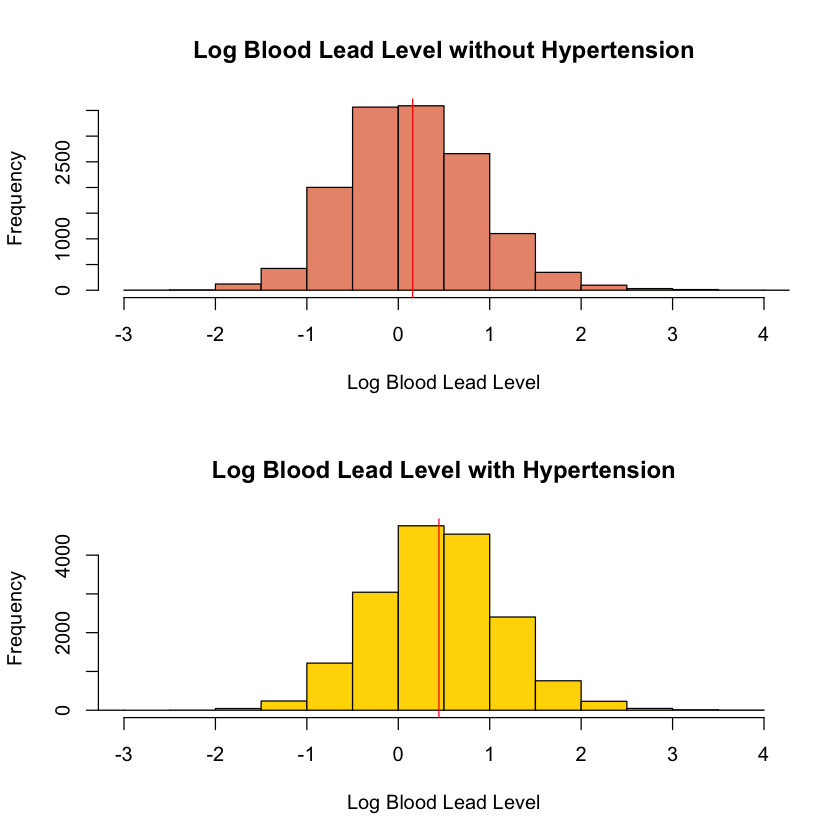

In [29]:
par(mfrow=c(2,1))
hist(log(nhanes$LEAD[nhanes$HYP == 0]), 
     main="Log Blood Lead Level without Hypertension", 
     xlab="Log Blood Lead Level", xlim = c(-3, 4), col ="darksalmon")
abline(v = mean(log(nhanes$LEAD[nhanes$HYP == 0])), col = "red")

hist(log(nhanes$LEAD[nhanes$HYP == 1]), 
     main="Log Blood Lead Level with Hypertension", 
     xlab="Log Blood Lead Level", xlim = c(-3, 4), col="gold")
abline(v = mean(log(nhanes$LEAD[nhanes$HYP == 1])), col = "red")

In [35]:
tbl_summary(nhanes, include=c("SEX", "RACE", "AGE", "ELEV_LEAD", "HYP", "SBP1", "DBP1"), 
            by = "ELEV_LEAD",
           statistic = list(all_continuous() ~ "{mean} ({min}, {max})")) %>%
  as_gt() %>%
  gt:::as.tags.gt_tbl()

Shiny tags cannot be represented in plain text (need html)